# steps to follow

1. Data importing

2. Data Cleaning and preprocessing

3. EDA

4. Model development and evaluation

5. Final deployment

# 1. Data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("student_scores - student_scores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 2. Data cleaning and preprocessing

In [4]:
df.shape

(25, 2)

In [5]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
dtype: bool

Since there are no null and duplicated data there was no need of cleaning the data

# EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
# statistical analysis
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


The average hours the student study is 5.01 hours/day and the average score a student scores is 51.48
whereas student with a highest score is 95 who study for 9.2 hours/day.

Let's visualize the data for better understanding

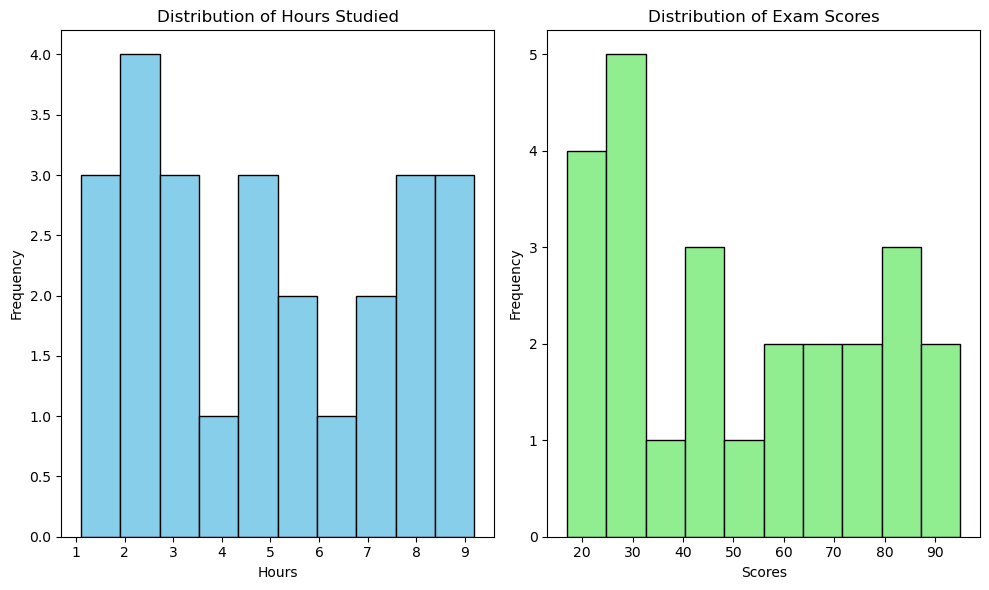

In [10]:
# Visualizations
# Histogram
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Hours'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Hours Studied')
plt.xlabel('Hours')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['Scores'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Distribution of Exam Scores')
plt.xlabel('Scores')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

As shown in the above histogram we can say that the student who study 2 hours a day and student who score 30 are quite high in number.

Let's check for the relation between the hours and scores

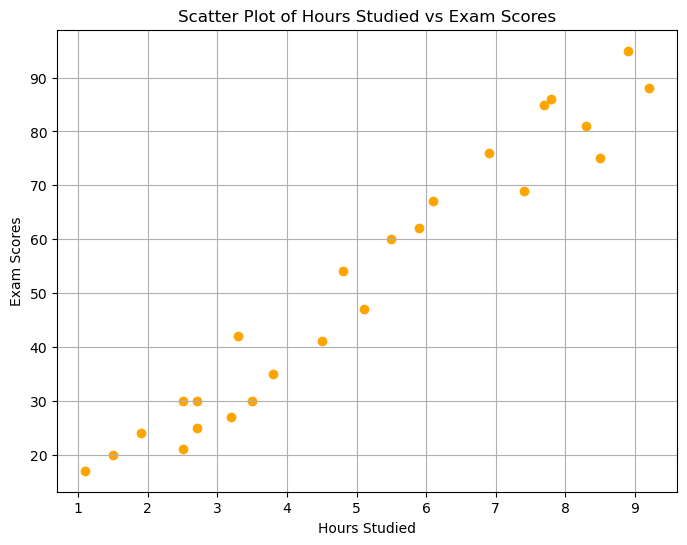

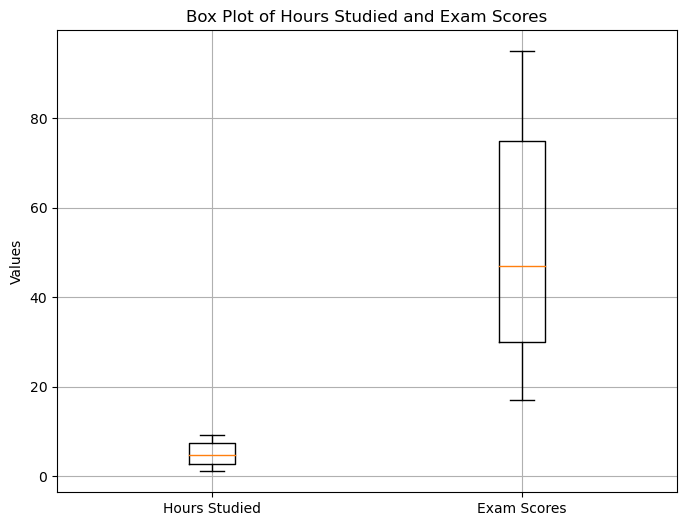

In [11]:
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Hours'], df['Scores'], color='orange')
plt.title('Scatter Plot of Hours Studied vs Exam Scores')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.grid(True)
plt.show()

# Box plot
plt.figure(figsize=(8, 6))
plt.boxplot([df['Hours'], df['Scores']], labels=['Hours Studied', 'Exam Scores'])
plt.title('Box Plot of Hours Studied and Exam Scores')
plt.ylabel('Values')
plt.grid(True)
plt.show()

As shown in the scatter plot as the number of hours increase the scores also increases so we cna consider they have strong relationship.

And the below boxplot show how the data are distributed in the dataset where there are no ouliers in the data which is good for us

# plotting heatmap to show the relationship between features

<AxesSubplot:>

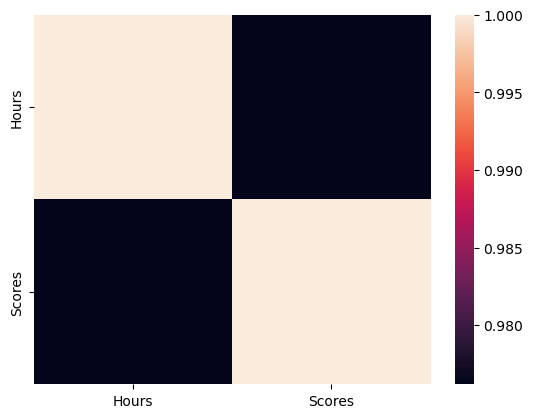

In [14]:
sns.heatmap(df.corr())

As indicates in the above heatmap the relation ship between hours and scores are quite high with around 0.98 correlation value

# 4. Model developement and evaluation

In [19]:
# import necessary library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

To build a predictive model which can predict the student score based on the number of hours I am going to use Linear Regression and to evaluation the model the evaluation metrics i have choosen are mean squared error and r2 score.

The reason I chose Linear regression is because since there is only one independent variable which is hours it makes a linear regression a straighforward choice.

As for the evaluation metrics:

R-squared (R2) Score: R-squared represents the proportion of the variance in the dependent variable (exam scores) that is explained by the independent variable (hours studied). It ranges from 0 to 1, where 1 indicates a perfect fit. R-squared is commonly used to assess how well the regression model fits the observed data. A higher R-squared value indicates a better fit.

Mean Squared Error (MSE): MSE measures the average squared difference between the actual and predicted values. It provides a measure of the model's accuracy, with lower values indicating better predictive performance. MSE penalizes larger errors more heavily than smaller ones, making it a suitable metric for regression tasks.

By using both R-squared and MSE, we can gain a comprehensive understanding of the model's performance. R-squared tells us how much of the variability in exam scores can be explained by the hours studied, while MSE gives us an idea of the magnitude of errors in the predictions.

In [20]:
# preparing the data
X=df[['Hours']]
y=df['Scores']

In [21]:
# split the dataset into train and test sets
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

Mean Squared Error: 18.943211722315272
R-squared Score: 0.9678055545167994


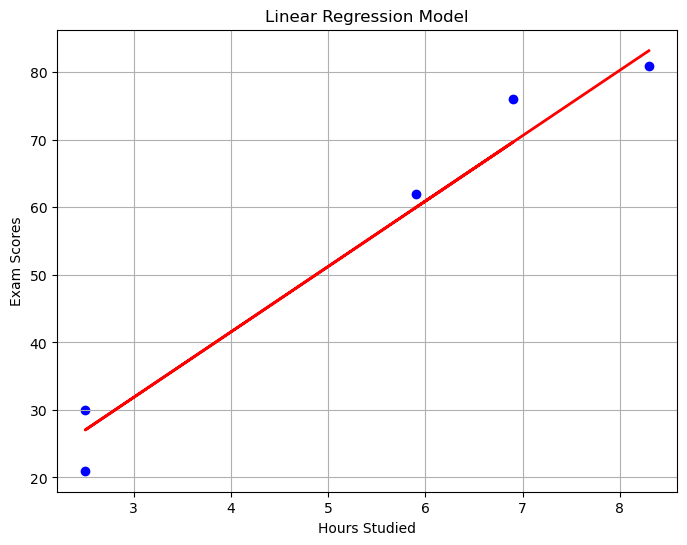

In [22]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Plot the regression line
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.title('Linear Regression Model')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Scores')
plt.grid(True)
plt.show()

comparing the predicted values with the acutal values

In [24]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153
